# Zimnat Insurance Recommendation  - Zindi 

### Business Need
For insurance markets to work well, insurance companies need to be able to pool and spread risk across a broad customer base. This works best where the population to be insured is diverse and large. In Africa, formal insurance against risk has been hampered by lack of private sector companies offering insurance, with no way to diversify and pool risk across populations.
Understanding the varied insurance needs of a population, and matching them to appropriate products offered by insurance companies, makes insurance more effective and makes insurance companies more successful.
At the heart of this, understanding the consumer of insurance products helps insurance companies refine, diversify, and market their product offerings. Increased data collection and improved data science tools offer the chance to greatly improve this understanding.
In this competition, you will leverage data and ML methods to improve market outcomes for insurance provider Zimnat, by matching consumer needs with product offerings in the Zimbabwean insurance market. Zimnat wants an ML model to use customer data to predict which kinds of insurance products to recommend to customers

###   Below is the Variable description of the train dataset
| variable         | description |
| ---------------- | ------------|
| `ID`                               | unique user id. |
| `join_date`                        | date the joined zimnat. |
| `sex`                              | sex of the client. |
| `marital_statu`                    | married status of the client. |
| `birth_year`                       | year client was born in. |
| `ranch_code`                       | branch where client signed up. |
| `occupation_code`                  | a code that describes what the client does. |
| `occupation_category_code`         | the category the clients job falls under. |
| `P5DA`                             | product code. |
| `RIBP`                             | product code. |
| `8NN1`                             | product code. |
| `7POT`                             | product code. |
| `66FJ`                             | product code. |
| `GYSR`                             | product code. |
| `SOP4`                             | product code. |
| `RVSZ`                             | product code. |
| `PYUQ`                             | product code. |
| `LJR9`                             | product code. |
| `N2MW`                             | product code. |
| `AHXO`                             | product code. |
| `BSTQ`                             | product code. |
| `FM3X`                             | product code. |
| `K6QO`                             | product code. |
| `QBOL`                             | product code. |
| `JWFN`                             | product code. |
| `JZ9D`                             | product code. |
| `J9JW`                             | product code. |
| `GHYX`                             | product code. |
| `ECY3`                             | product code. |

# Imports

In [1]:
# pandas
import pandas as pd, gc
from pandas import Series,DataFrame

# os
import os

from datetime import date 

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# warnings
import warnings
warnings.filterwarnings('ignore')

# sklearn packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.pipeline import Pipeline

# Loading Data

In [2]:
 # set the path of the raw data
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'Train.csv')
test_file_path = os.path.join(raw_data_path, 'Test.csv')
submission_file_path = os.path.join(raw_data_path, 'SampleSubmission.csv')
    

In [3]:
train_df = pd.read_csv(train_file_path, parse_dates = ['join_date'])
test_df = pd.read_csv(test_file_path, parse_dates = ['join_date'])

In [4]:
# printing dataset shape
print("Shape of train set: ", train_df.shape)
print("Shape of test set: ", test_df.shape)

Shape of train set:  (29132, 29)
Shape of test set:  (10000, 29)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
ID                          29132 non-null object
join_date                   29130 non-null datetime64[ns]
sex                         29132 non-null object
marital_status              29132 non-null object
birth_year                  29132 non-null int64
branch_code                 29132 non-null object
occupation_code             29132 non-null object
occupation_category_code    29132 non-null object
P5DA                        29132 non-null int64
RIBP                        29132 non-null int64
8NN1                        29132 non-null int64
7POT                        29132 non-null int64
66FJ                        29132 non-null int64
GYSR                        29132 non-null int64
SOP4                        29132 non-null int64
RVSZ                        29132 non-null int64
PYUQ                        29132 non-null int64
LJR9                        29132 non-null 

In [6]:
train_df.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,2019-01-02,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,2019-01-06,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,2013-01-06,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,2019-01-08,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,2019-01-08,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0


In [7]:
test_df.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,2018-01-12,M,M,1984,94KC,DZRV,90QI,0,0,...,0,0,0,0,0,0,0,0,0,0
1,H6141K3,2019-01-10,M,M,1996,1X1H,J9SY,90QI,0,0,...,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,2020-01-01,F,W,1968,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,2019-01-02,M,M,1989,94KC,2A7I,T4MS,0,0,...,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,2020-01-02,F,M,1982,UAOD,0KID,T4MS,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
train_df['occupation_code'].nunique()

233

In [9]:
test_df['occupation_code'].nunique()

187

In [10]:
class Information:
    def __init__(self):
        """
        This class give some brief information about the datasets.
        """
        print("Information object created")
    
    def _get_missing_values(self,data):
        """
        Find missing values of given datad
        :param data: checked its missing value
        :return: Pandas Series object
        """
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)

        #Returning missing values
        return missing_values
    
    def _get_unique_values(self,data):
        #Getting unique alues for each feature
        unique_values = data.nunique()
        #Sorting the values
        unique_values.sort_values(ascending=False, inplace=True)
        
        #Returning unique values values
        return unique_values

In [11]:
# Calling the function Information()
data_info = Information()
# Getting the unique values for the columns in train_data
data_info._get_unique_values(train_df)

Information object created


ID                          29132
occupation_code               233
join_date                     132
birth_year                     61
branch_code                    15
marital_status                  8
occupation_category_code        6
GYSR                            2
sex                             2
P5DA                            2
RIBP                            2
8NN1                            2
7POT                            2
66FJ                            2
ECY3                            2
GHYX                            2
RVSZ                            2
PYUQ                            2
LJR9                            2
N2MW                            2
AHXO                            2
BSTQ                            2
FM3X                            2
K6QO                            2
QBOL                            2
JWFN                            2
JZ9D                            2
J9JW                            2
SOP4                            2
dtype: int64

In [12]:
# Getting the missing values for the columns in train_data
data_info._get_missing_values(train_df)

join_date                   2
ECY3                        0
GYSR                        0
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
SOP4                        0
GHYX                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
ID                          0
dtype: int64

In [13]:
# Variable : join_date
train_df['join_date'].value_counts()

2018-01-05    1319
2019-01-05    1199
2018-01-04    1123
2019-01-04    1043
2019-01-01     754
              ... 
2012-02-09       1
2013-05-23       1
2012-08-09       1
2013-11-01       1
2012-07-09       1
Name: join_date, Length: 132, dtype: int64

We will use the data with the most frequency to impute the missing values

In [14]:
# Variable : join_date
test_df['join_date'].value_counts()

2018-01-05    513
2019-01-05    395
2018-01-04    369
2019-01-04    336
2019-01-06    289
             ... 
2010-01-06      2
2010-01-08      1
2012-10-24      1
2012-02-09      1
2012-07-09      1
Name: join_date, Length: 126, dtype: int64

In [15]:
# replacing f with F in the train data set
train_df['marital_status'].replace({'f': 'F'}, inplace=True)

# Performing axis tranformation
def my_data_transformation(data):
    
    ## replace the missing values with '1/5/2018'
    data.join_date.fillna('2018-01-05', inplace=True)
    '''
    Computing the duration  of the client in the insurance company;
    '''
    #converting the 'Date' column  to date formate
    data["join_date"] = pd.to_datetime(data["join_date"],format = "%Y-%m-%d")
    today = date.today()
    
    data["client_duration"] = today.year - data["join_date"].dt.year
    
    '''
    Computing the age  of the client;
    '''
    data["age"] = today.year - data["birth_year"]
    
    # Variable transformation to  VartoCases.
    data = data.melt(id_vars = ['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
                                      'occupation_code', 'occupation_category_code',"client_duration","age"],
                           value_vars = ['P5DA', 'RIBP', '8NN1',
                                        '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
                                       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3'],
                          var_name = 'PCODE',value_name = 'Label')
    
    #Now that we have our product code in VarToCases, Let's now introduce a ID X PCODE in preparation of the Submission.
    data["ID X PCODE"] = data['ID'] + ' X ' + data['PCODE']

    return data

In [16]:
train_df = my_data_transformation(train_df)
test_df = my_data_transformation(test_df)

In [17]:
# Rearranging columns
train_df=train_df[['ID', 'join_date', 'sex', 'age', 'client_duration', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'PCODE','ID X PCODE',  'Label']]
test_df=test_df[['ID', 'join_date', 'sex', 'age', 'client_duration', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'PCODE','ID X PCODE']]

In [18]:
train_df.head()

,ID,join_date,sex,age,client_duration,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,PCODE,ID X PCODE,Label
0,4WKQSBB,2019-01-02,F,33,1,M,1987,1X1H,2A7I,T4MS,P5DA,4WKQSBB X P5DA,0
1,CP5S02H,2019-01-06,F,39,1,M,1981,UAOD,2A7I,T4MS,P5DA,CP5S02H X P5DA,0
2,2YKDILJ,2013-01-06,M,29,7,U,1991,748L,QZYX,90QI,P5DA,2YKDILJ X P5DA,0
3,2S9E81J,2019-01-08,M,30,1,M,1990,1X1H,BP09,56SI,P5DA,2S9E81J X P5DA,0
4,BHDYVFT,2019-01-08,M,30,1,M,1990,748L,NO3L,T4MS,P5DA,BHDYVFT X P5DA,0


In [19]:
test_df.head()

,ID,join_date,sex,age,client_duration,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,PCODE,ID X PCODE
0,F86J5PC,2018-01-12,M,36,2,M,1984,94KC,DZRV,90QI,P5DA,F86J5PC X P5DA
1,H6141K3,2019-01-10,M,24,1,M,1996,1X1H,J9SY,90QI,P5DA,H6141K3 X P5DA
2,RBAYUXZ,2020-01-01,F,52,0,W,1968,UAOD,2A7I,T4MS,P5DA,RBAYUXZ X P5DA
3,KCBILBQ,2019-01-02,M,31,1,M,1989,94KC,2A7I,T4MS,P5DA,KCBILBQ X P5DA
4,LSEC1ZJ,2020-01-02,F,38,0,M,1982,UAOD,0KID,T4MS,P5DA,LSEC1ZJ X P5DA


# Basic Structure

In [20]:
# Summary of the numerical columns
train_df.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,611772.0,40.482940,9.325452,9.0,33.0,40.0,47.0,88.0
client_duration,611772.0,2.280345,1.914390,0.0,1.0,2.0,3.0,10.0
birth_year,611772.0,1979.517060,9.325452,1932.0,1973.0,1980.0,1987.0,2011.0
Label,611772.0,0.108460,0.310961,0.0,0.0,0.0,0.0,1.0


## Univariate Analysis

In [97]:
# A function that plots for us the bar plots.
def catplot(x,data):
    plot= sns.catplot(x, kind="count", data=data, palette="Set1")
    plt.xticks(rotation=45, horizontalalignment='right' )
    plt.title("counts"+ " "+ "of" + " "+ " " + x )
    return 

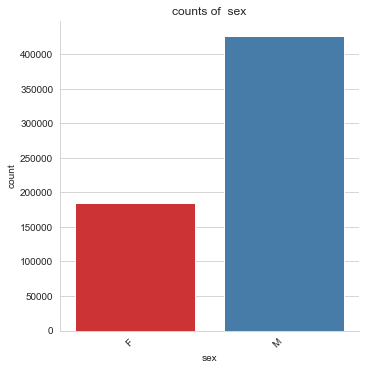

In [98]:
# A bar plot for the gender clients.
catplot("sex",data = train_df)

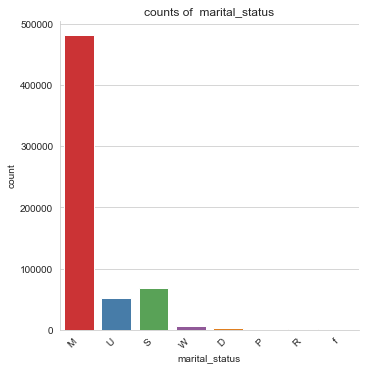

In [80]:
# A bar plot for the client's marital status.
catplot("marital_status",data = train_df)

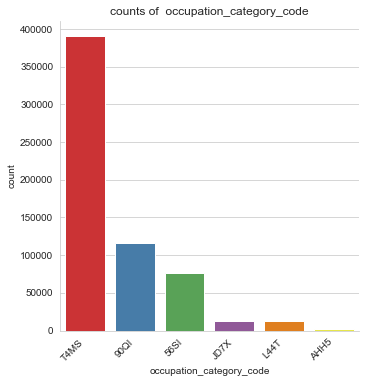

In [81]:
# A bar plot for the client's job category.
catplot("occupation_category_code",data = train_df)

In [21]:
train_df.sample(3)

,ID,join_date,sex,age,client_duration,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,PCODE,ID X PCODE,Label
215354,H9N063X,2018-01-07,M,45,2,M,1975,94KC,UJ5T,T4MS,RVSZ,H9N063X X RVSZ,1
14953,QGWAY0A,2010-01-08,F,32,10,S,1988,748L,RUFT,T4MS,P5DA,QGWAY0A X P5DA,0
486990,X48L140,2018-01-04,M,41,2,M,1979,UAOD,SST3,56SI,JWFN,X48L140 X JWFN,0


In [22]:
#Confirm Distribution (TRAIN FILE)
print('==' * 18);print('TRAIN LABEL DISTRIBUTION');print('==' * 18);print(train_df['Label'].value_counts())

TRAIN LABEL DISTRIBUTION
0    545419
1     66353
Name: Label, dtype: int64


In [23]:
#Checking for data co-existence in Train/Test
for col in ['PCODE','occupation_code', 'branch_code','occupation_category_code']:
    train_col = train_df[col].unique()
    test_col = test_df[col].unique()
    print ('Not in Test ' + col + ' ',[i  for i in train_col if i not in test_col])
    print ('Not in Train ' + col + ' ',[i  for i in test_col  if i not in train_col]);print('==' * 30)

Not in Test PCODE  []
Not in Train PCODE  []
Not in Test occupation_code  ['IE90', 'Q0LY', 'JSAX', '6XXU', '8HRZ', 'OQMY', 'INEJ', 'VZN9', 'UC7E', 'PSUY', 'WSRG', 'JQH3', 'LGTN', '738L', 'QQUP', '2XZ1', 'CAAV', 'LLLH', 'W1X2', 'DHSN', 'IX8T', '2US6', 'ZWPL', 'MEFQ', '9B5B', 'JUIP', 'BFD1', 'A4ZC', 'IMHI', 'E5PF', 'GZA8', '3YQ1', 'PJR4', 'NDL9', 'PPNK', '2686', '5LNN', '374O', 'URYD', 'M0WG', 'KBWO', 'ONY7', 'VYSA', 'KUPK', 'R7GL', 'HSVE', 'BER4', '6SKY', 'RH2K', 'ZHC2', 'W3ZV', 'FLXH', 'UYDZ', 'YJXM', '59QM']
Not in Train occupation_code  ['0ZND', '8CHJ', '9F96', 'HSI5', '93OJ', 'BIA0', 'E2MJ', 'JBJP', '0FOI']
Not in Test branch_code  []
Not in Train branch_code  []
Not in Test occupation_category_code  []
Not in Train occupation_category_code  []


In [24]:
# function to preprocess our data from train models
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaler = StandardScaler()
def preprocessing_data(data):

    # Convert the following numerical labels from integer to float
    float_array = data[["age", "client_duration","birth_year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = [
    'branch_code','occupation_category_code','marital_status'
    ]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Binary Encoding : sex
    data["IsMale"] = np.where(data.sex == 'M', 1, 0)
    
    # Label Encoder conversion
    data["occupation_code"] = le.fit_transform(data["occupation_code"])
    data["PCODE"] = le.fit_transform(data["PCODE"])
    data["ID"] = le.fit_transform(data["ID"])
    
    # drop sex column
    data = data.drop(["sex"], axis=1)
    
    # Select numerical columns
    numeric_columns = ["age","client_duration","birth_year"]
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
    
    return data

In [25]:
train_df = preprocessing_data(train_df)
test_df = preprocessing_data(test_df)

In [26]:
train_df.shape

(611772, 39)

In [33]:
train_df.head()

,ID,age,client_duration,occupation_code,PCODE,Label,branch_code_1X1H,branch_code_30H5,branch_code_49BM,branch_code_748L,...,occupation_category_code_T4MS,marital_status_D,marital_status_F,marital_status_M,marital_status_P,marital_status_R,marital_status_S,marital_status_U,marital_status_W,IsMale
0,3999,-0.802422,-0.668801,17,15,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,10274,-0.159021,-0.668801,17,15,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2388,-1.231356,2.465359,176,15,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,2233,-1.124122,-0.668801,76,15,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,9326,-1.124122,-0.668801,148,15,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [28]:
test_df.shape

(210000, 38)

In [29]:
# dropping columns we don't need
train_df = train_df.drop(['join_date', 'ID X PCODE', 'birth_year'], axis=1)

In [30]:
test_df = test_df.drop(['join_date', 'birth_year'], axis=1)

In [31]:
train_df.head()

,ID,age,client_duration,occupation_code,PCODE,Label,branch_code_1X1H,branch_code_30H5,branch_code_49BM,branch_code_748L,...,occupation_category_code_T4MS,marital_status_D,marital_status_F,marital_status_M,marital_status_P,marital_status_R,marital_status_S,marital_status_U,marital_status_W,IsMale
0,3999,-0.802422,-0.668801,17,15,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,10274,-0.159021,-0.668801,17,15,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2388,-1.231356,2.465359,176,15,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,2233,-1.124122,-0.668801,76,15,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,9326,-1.124122,-0.668801,148,15,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [34]:
test_df.head()

,ID,age,client_duration,occupation_code,PCODE,ID X PCODE,branch_code_1X1H,branch_code_30H5,branch_code_49BM,branch_code_748L,...,occupation_category_code_T4MS,marital_status_D,marital_status_F,marital_status_M,marital_status_P,marital_status_R,marital_status_S,marital_status_U,marital_status_W,IsMale
0,4257,-0.463010,-0.146502,79,15,F86J5PC X P5DA,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,4834,-1.751982,-0.664178,103,15,H6141K3 X P5DA,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,7655,1.255620,-1.181853,18,15,RBAYUXZ X P5DA,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,5729,-1.000081,-0.664178,18,15,KCBILBQ X P5DA,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,6141,-0.248181,-1.181853,3,15,LSEC1ZJ X P5DA,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


# Saved processed data

In [61]:
processed_data_path = os.path.join(os.path.pardir, 'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [62]:
# train data
train_df.to_csv(write_train_path, index=False)
#test data
test_df.to_csv(write_test_path, index=False)